In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/91969/Downloads/avocado.csv.zip')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Observation
1.Above is our dataset which contains 18249 rows and 14 columns.

2.Here we have to predict 2 columns one  by one i.e average price which is regression problem and region which is multiclass classification problem.We will do this one at a time.

3.Here unnamed column is unnecessary so we can drop it off.

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.shape

(18249, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


# Observation
1.There are no nulls in our dataset.

2.type,region have dtype object and have categorical data where as year have dtype int and also have categorical data.

3.Rest all columns have dtype as float and have cont data.

4.So now we have label or target variable as average price and rest all are our features

In [6]:
#let's drop duplicated
df.drop_duplicates(inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
#let's check value counts
df['Date'].value_counts()

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

In [8]:
df['year'].nunique()

4

# Observation
Let's change Date dtype to Datetime dtype

In [9]:
#changing dtype of DateTime
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [11]:
df['Day'].nunique()

31

# Observation
Now we have change dtype of Date and separated month and day,year is already there.

so now we can drop Date column

In [12]:
df.drop('Date',axis=1,inplace=True)
df.shape

(18249, 14)

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# Observation
1.Mean is greater than median for Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags. it Means data is right skewed .

2.There is a large diff between 75% and max ,hence outliers are also present.

3.We can also see 25%,min value and other statistics as well

# Let's do graphical analysis

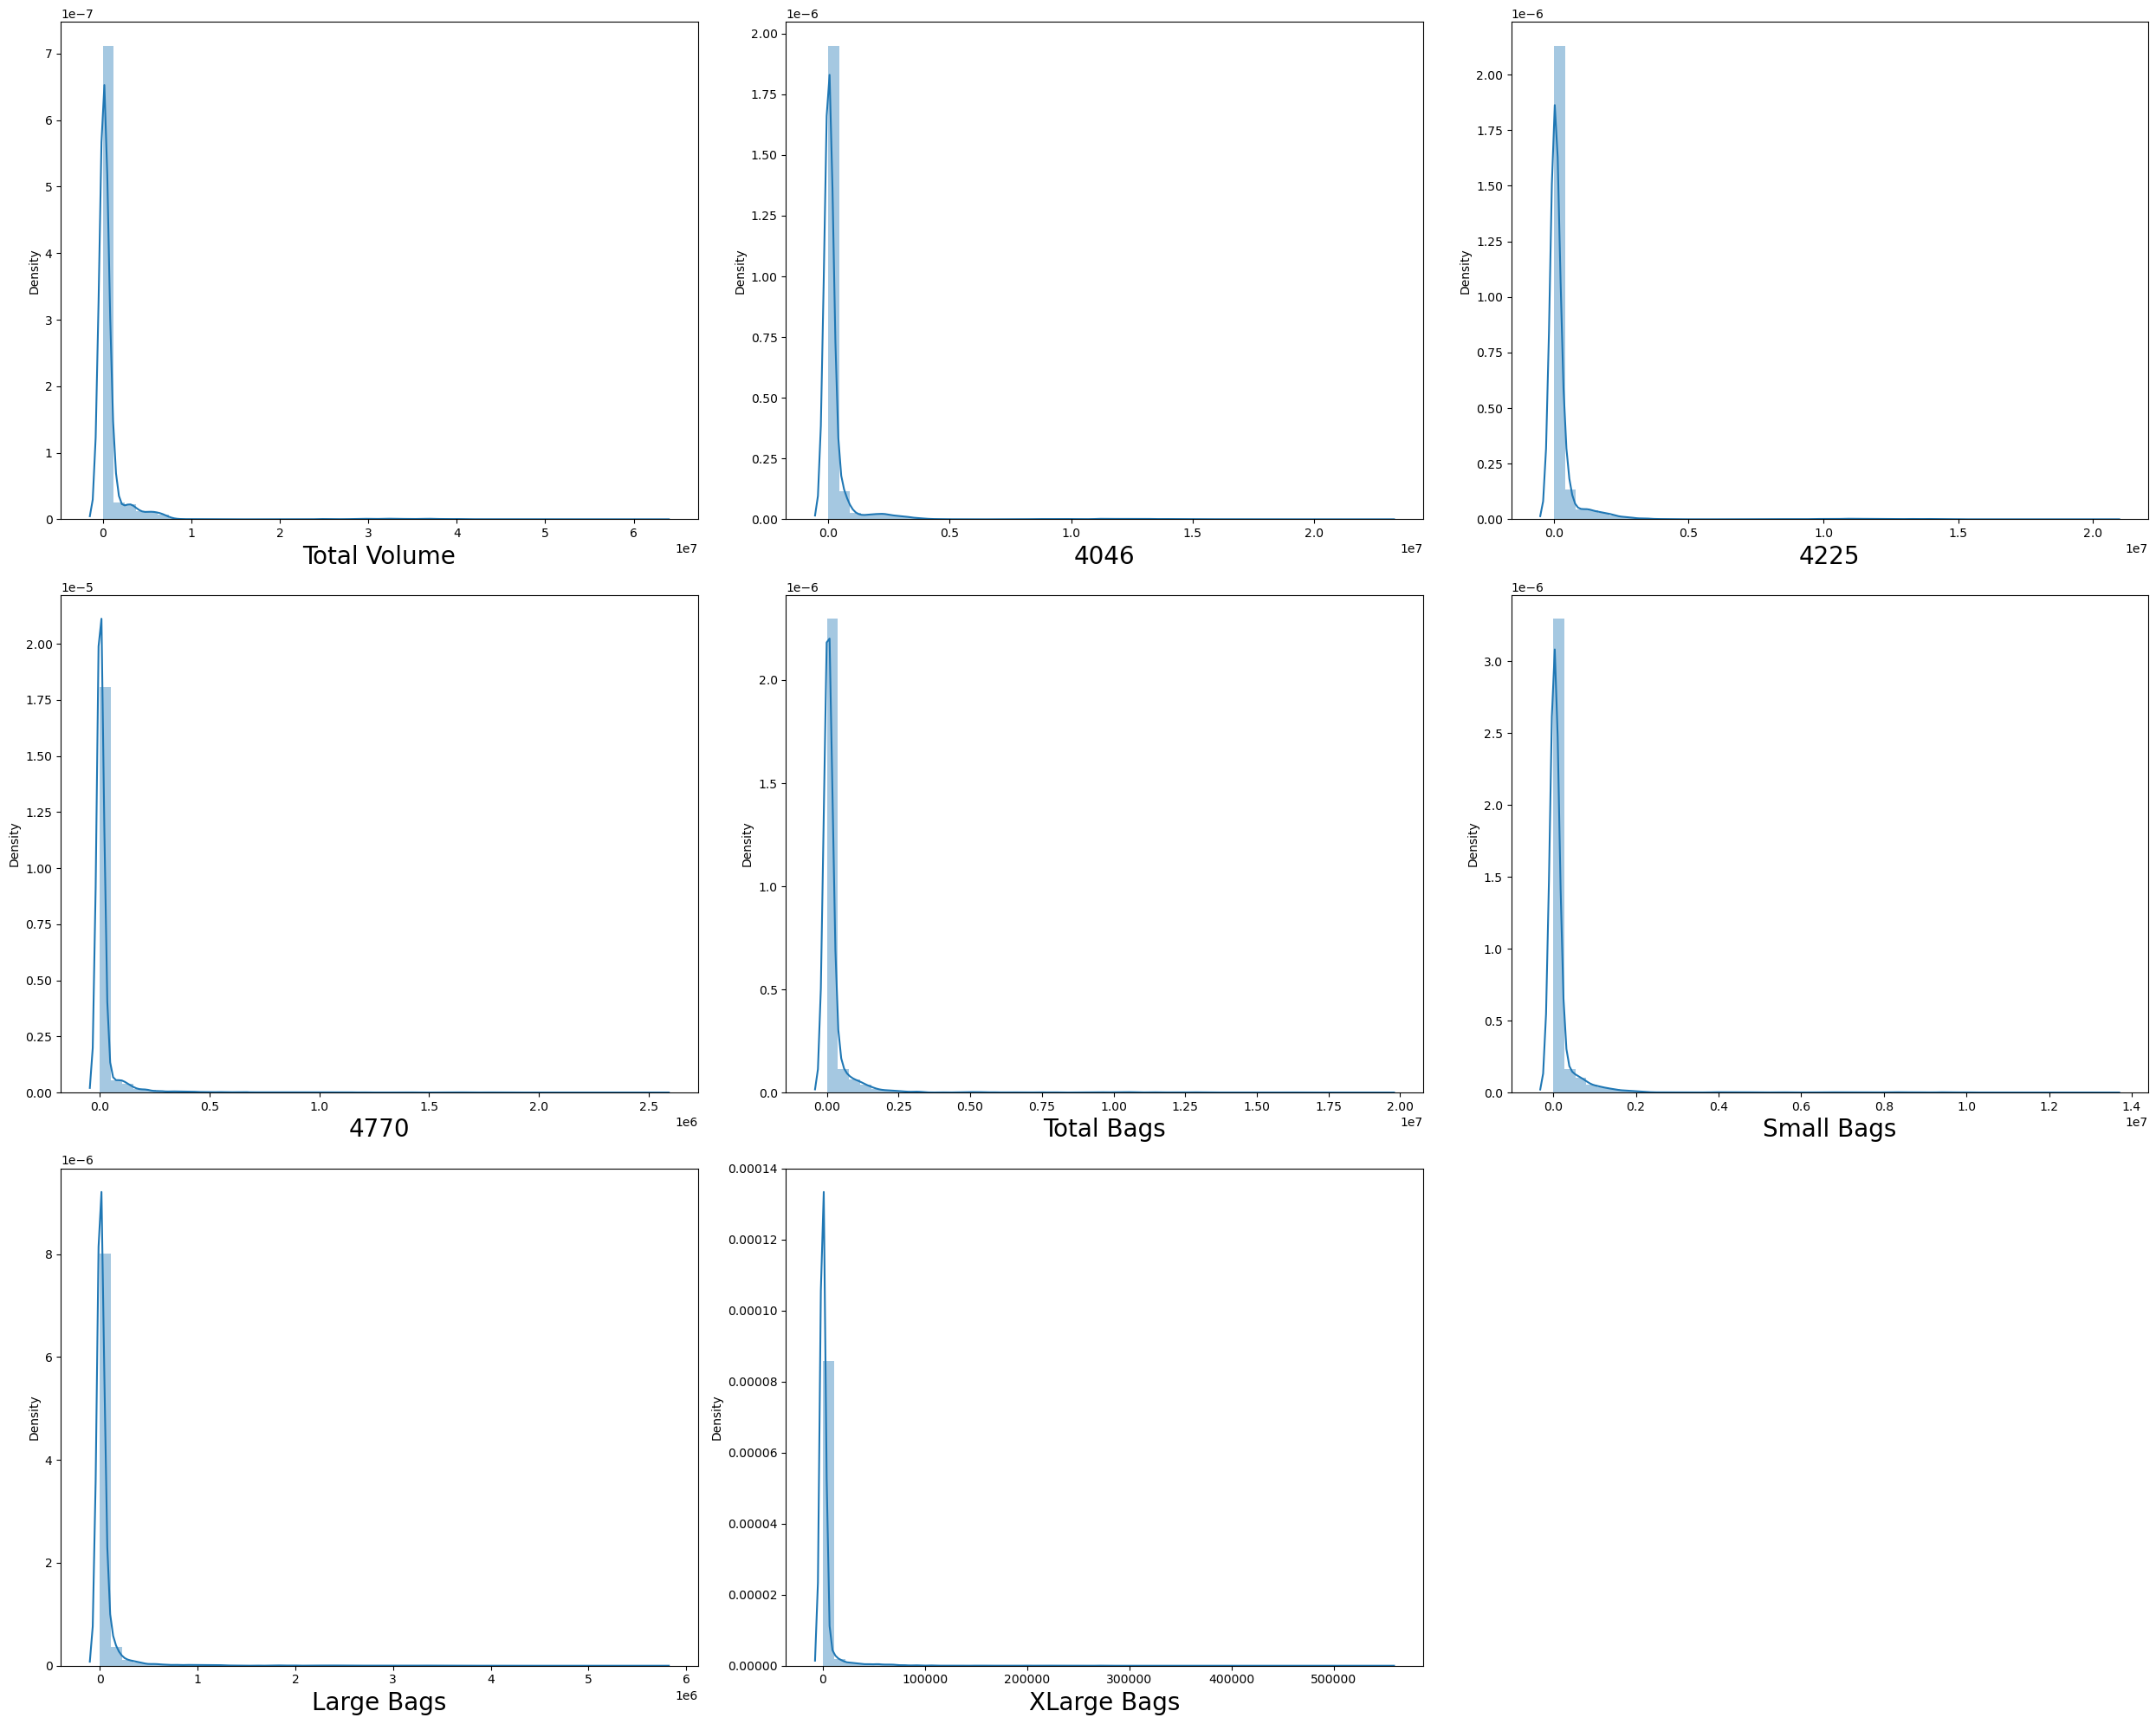

In [14]:
#Let's check data distribution for each column

plt.figure(figsize=(25,20))
plotnumber = 1
for col in df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
After checking distplot we can observe that all graph are touching a certain peak and data is skewed to right and have outliers

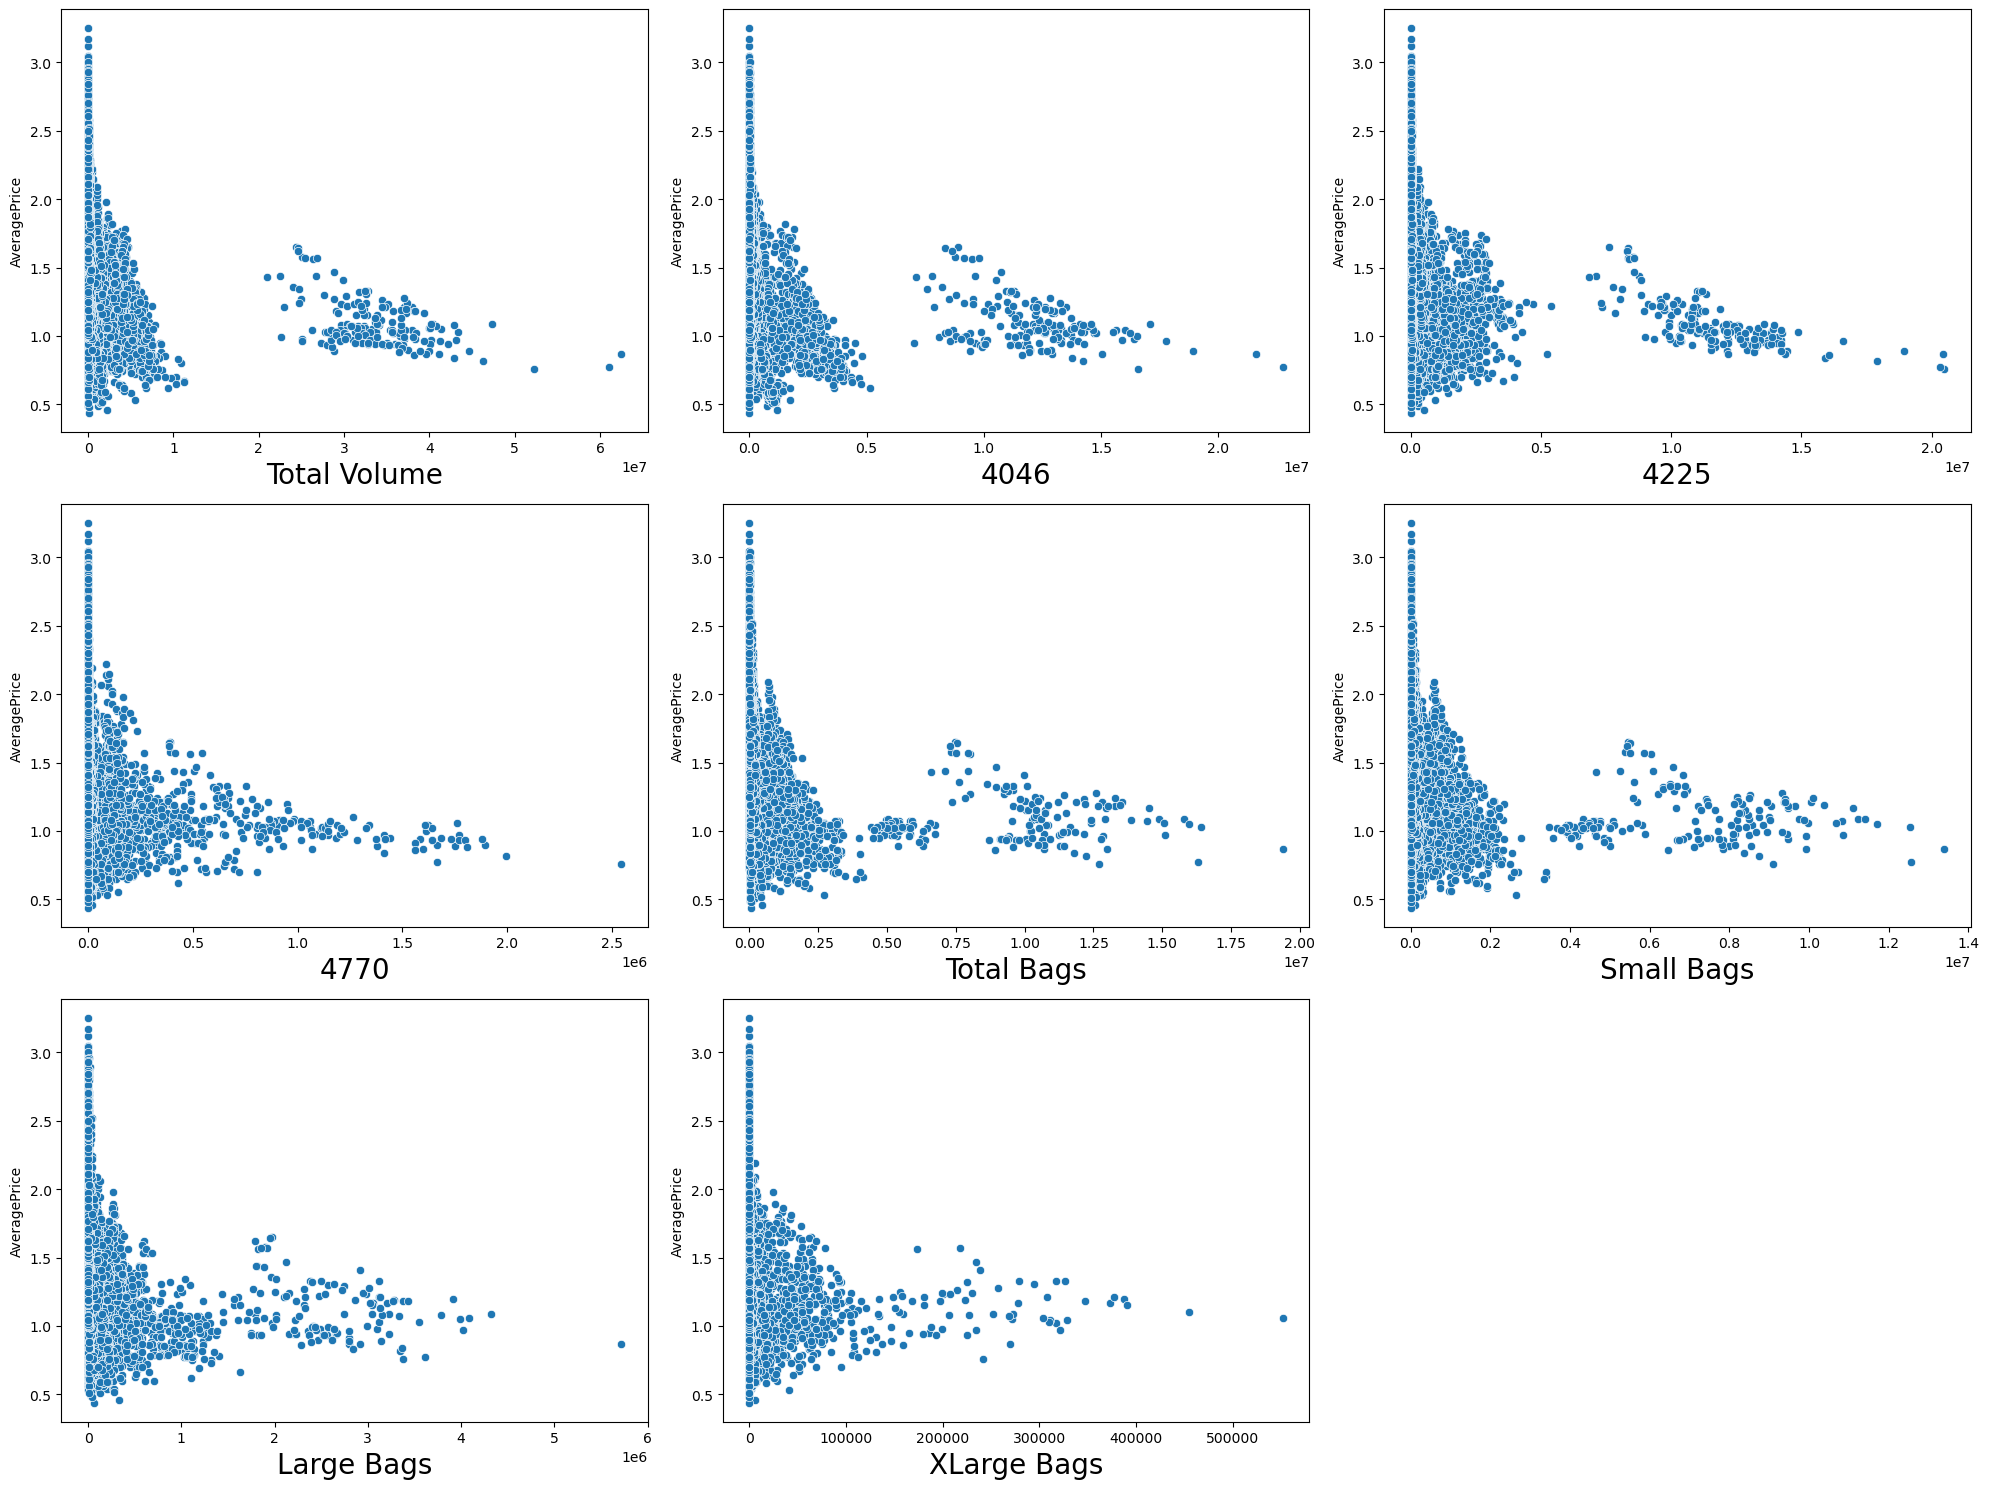

In [15]:
#lets plot scatter plot
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x=df[col],y=df['AveragePrice'],data=df)
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

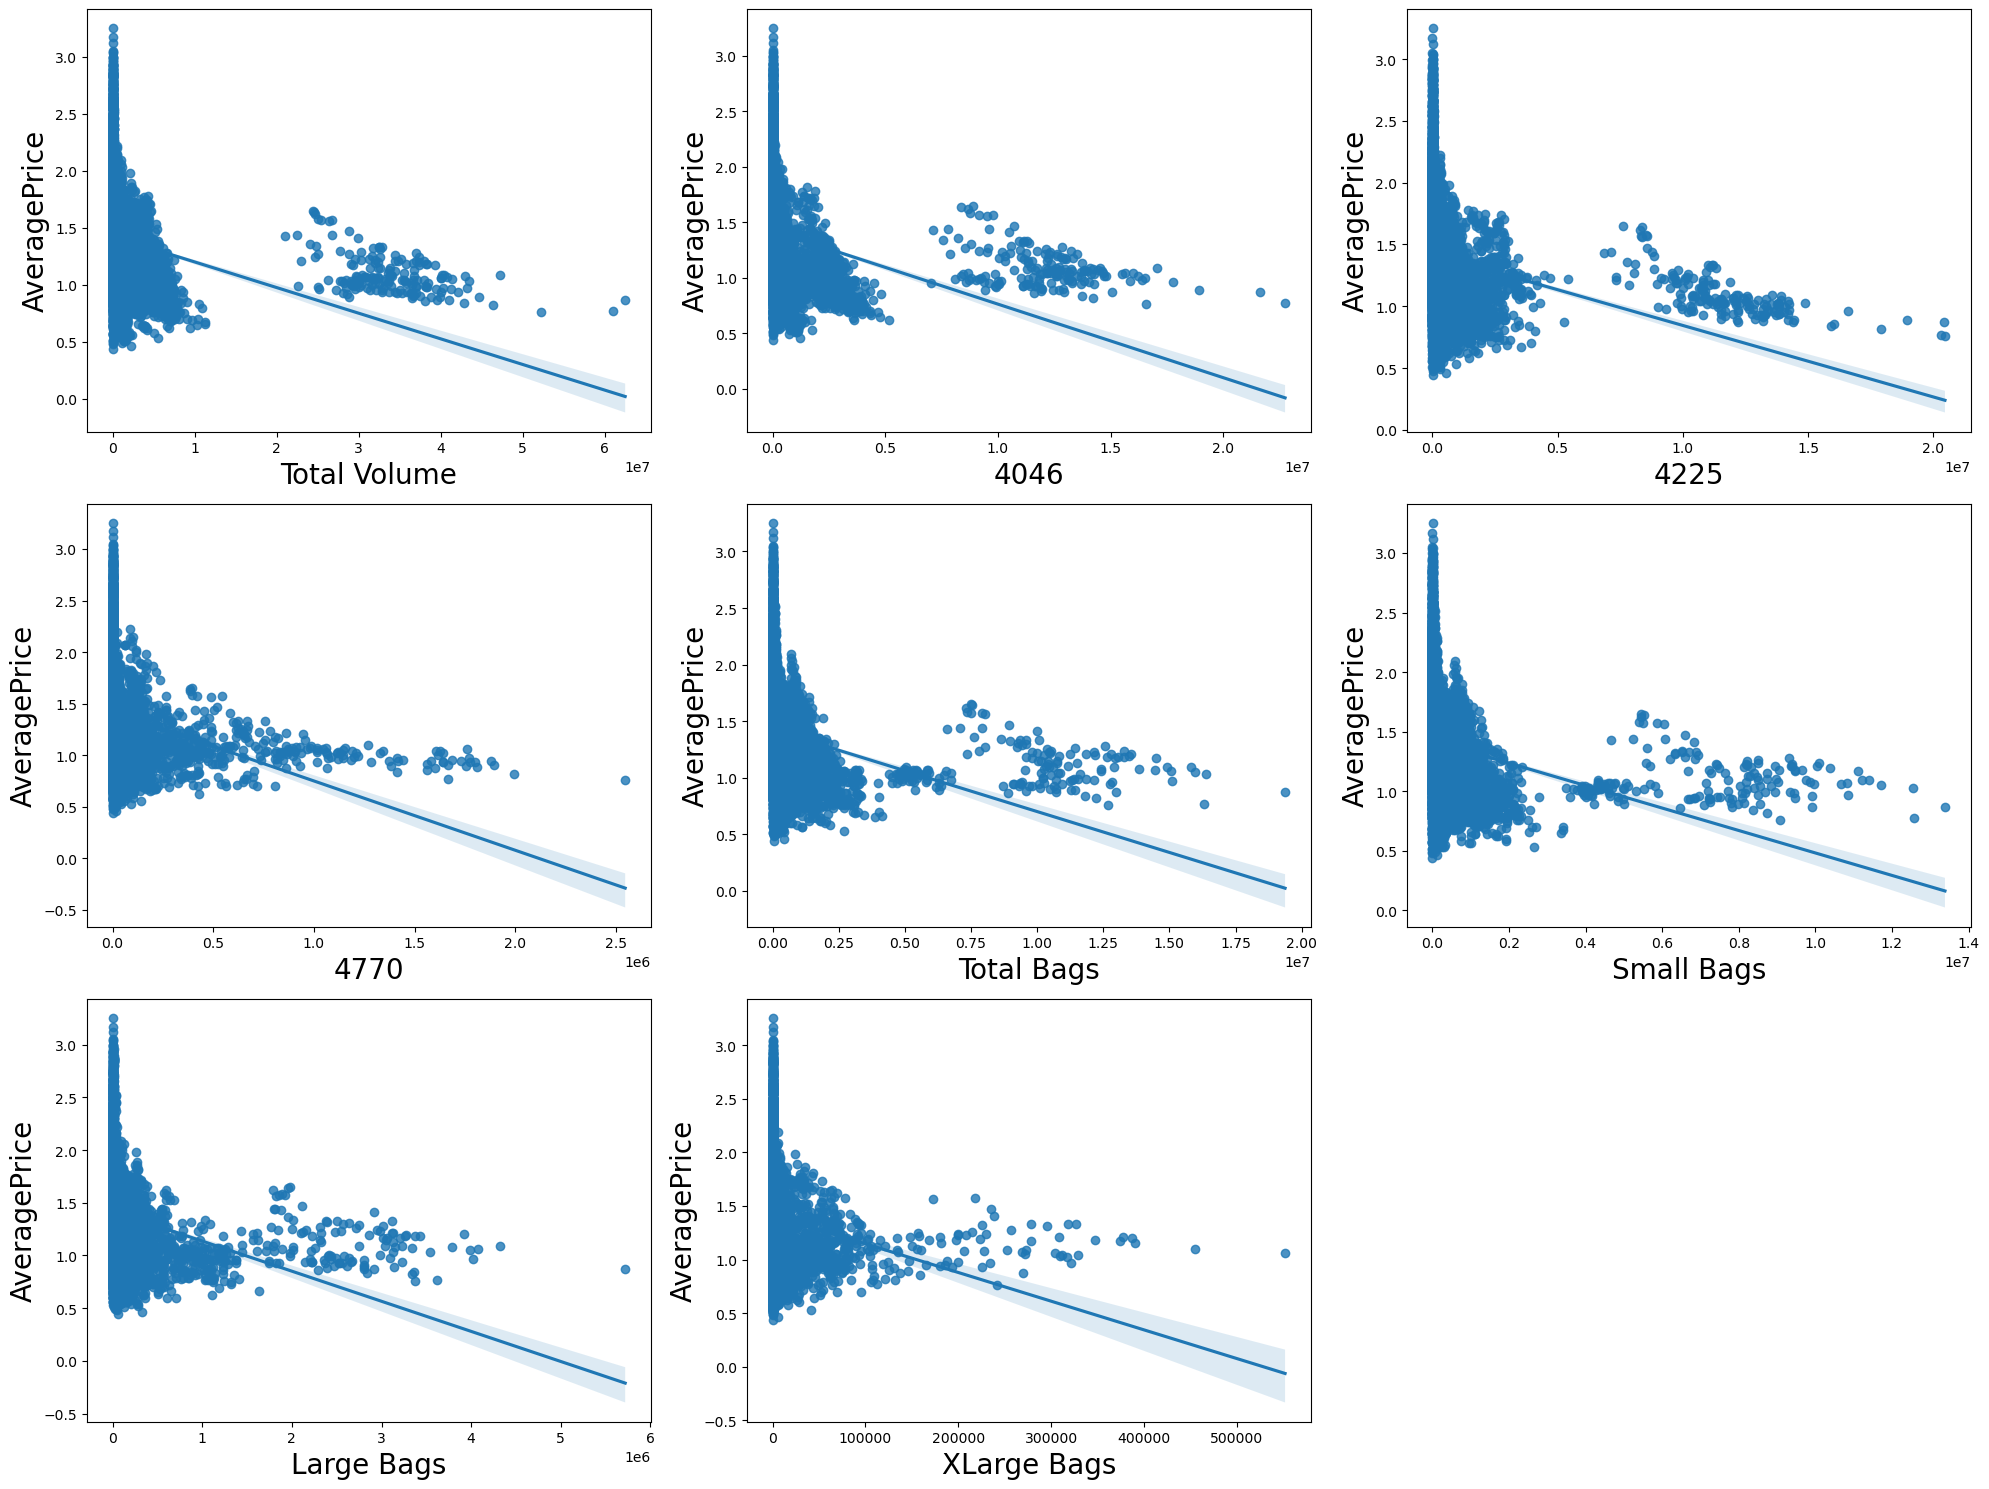

In [16]:
#lets plot reg plot
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.regplot(x=col,y='AveragePrice',data=df)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
From above plots we can observe that as the value increases in each column ,average price decreases.

it means there is negative relation.

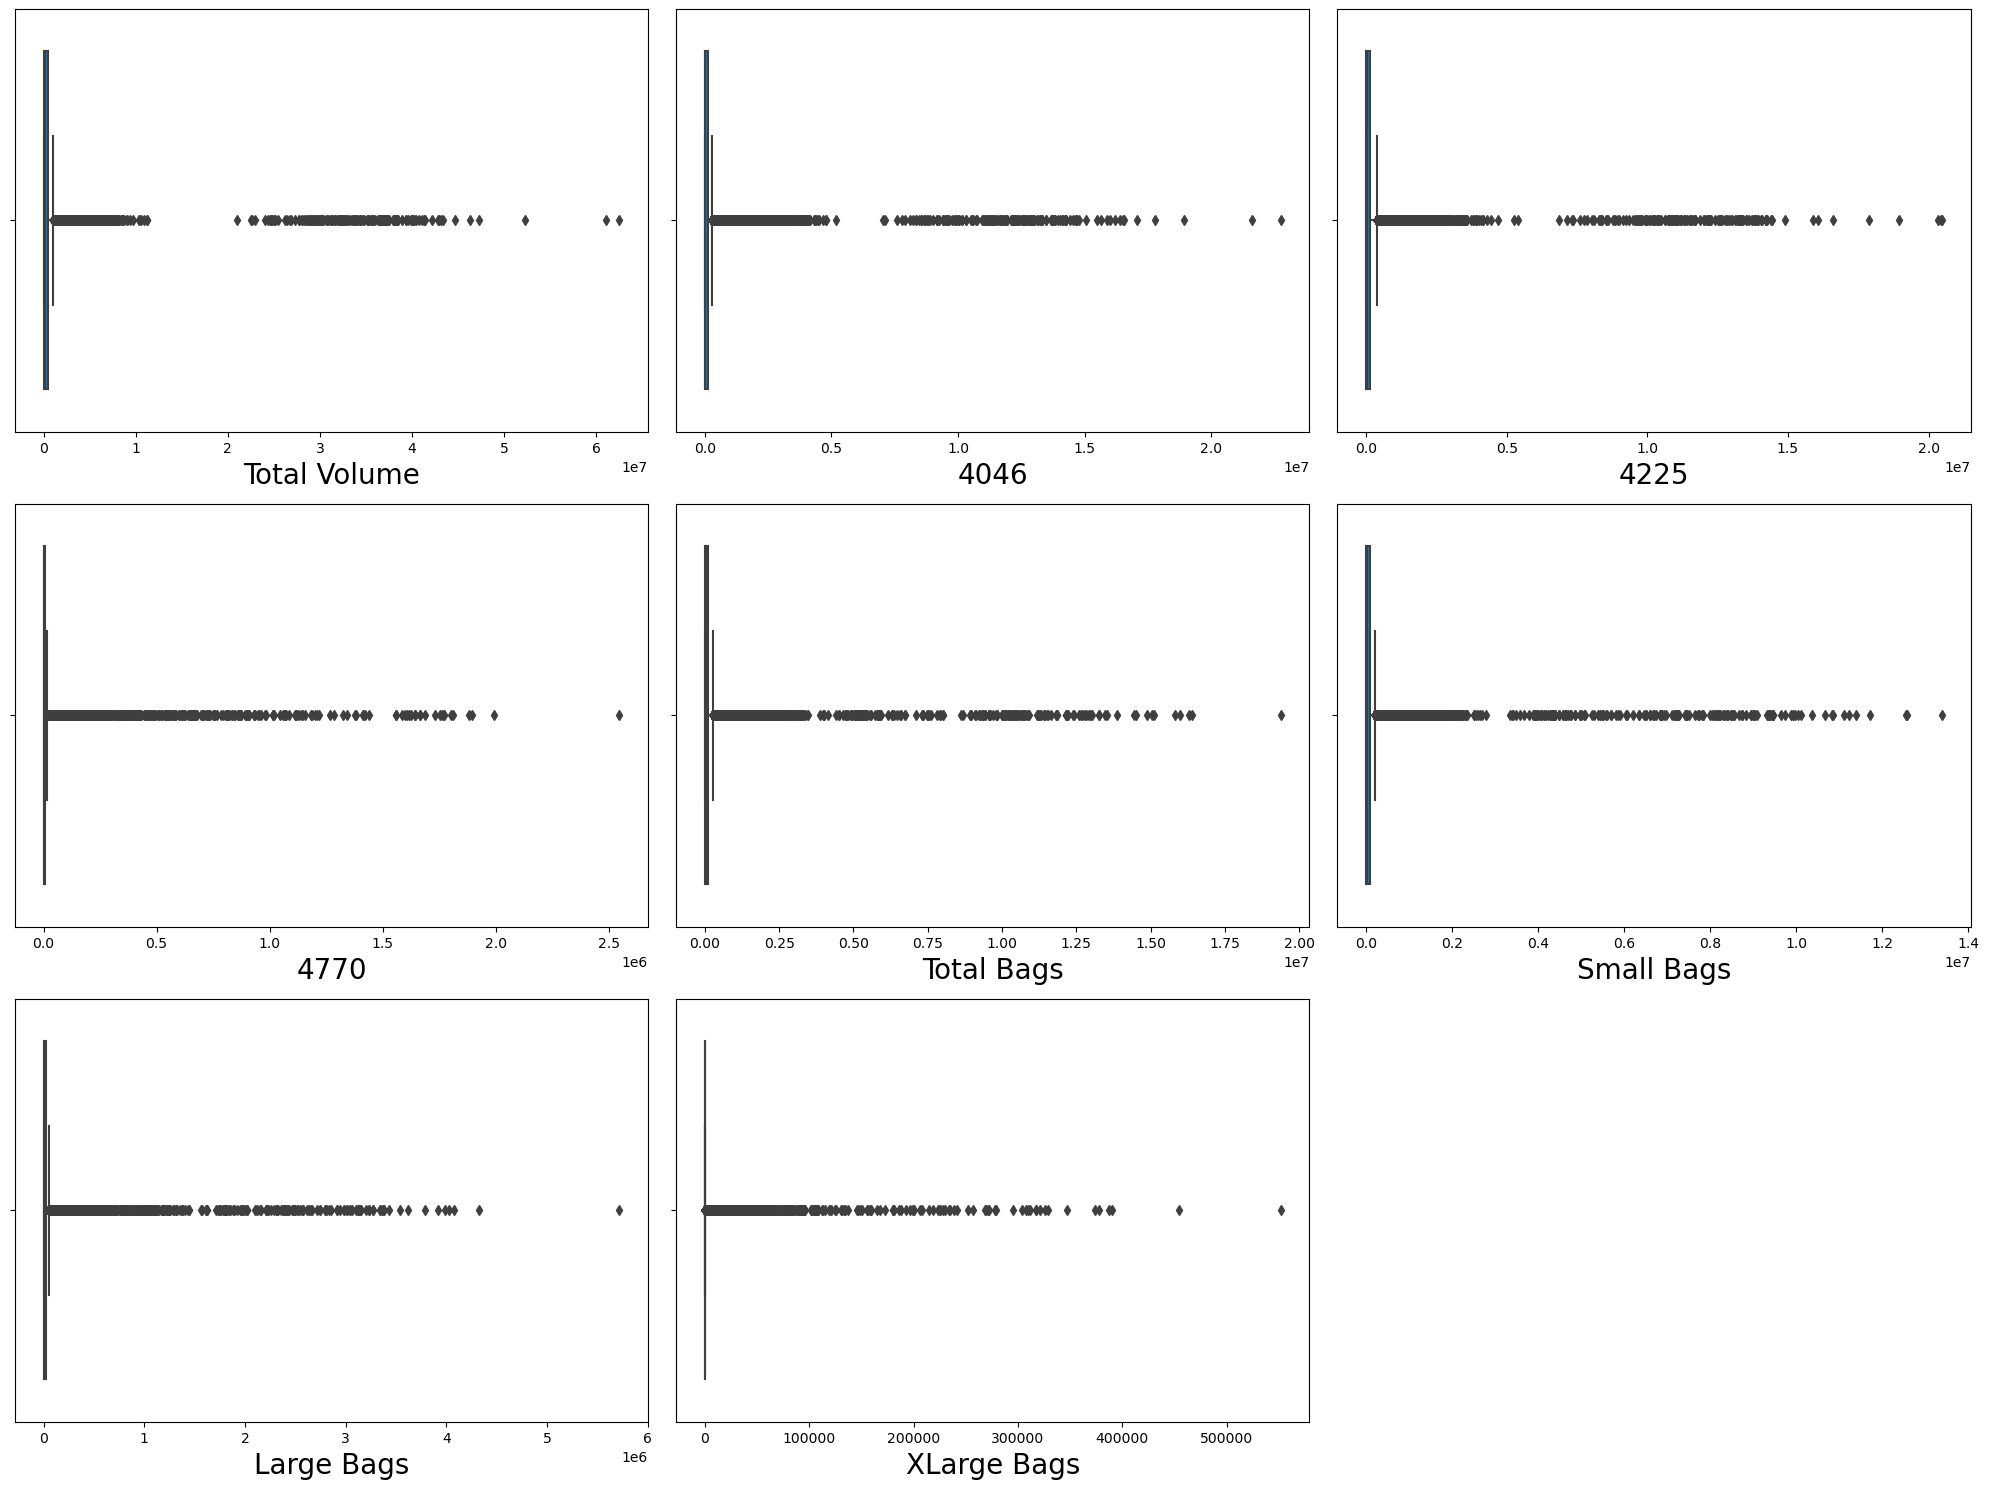

In [17]:
#lets plot box plot
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df[col],data=df)
        plt.xlabel(col, fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

# Obervation
There are too many outliers in our data set. We will remove them

In [18]:
#let's check for skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

# Observation
There is too much skewness in our dataset ,let's try diff methods to remove skewness

In [19]:
#Let's use log transformation method
#Lets impute 0 with their mean
df['4046']=df['4046'].replace(0,df['4046'].mean())
df['4225']=df['4225'].replace(0,df['4225'].mean())
df['4770']=df['4770'].replace(0,df['4770'].mean())
df['Total Bags']=df['Total Bags'].replace(0,df['Total Bags'].mean())
df['Small Bags']=df['Small Bags'].replace(0,df['Small Bags'].mean())
df['Large Bags']=df['Large Bags'].replace(0,df['Large Bags'].mean())
df['XLarge Bags']=df['XLarge Bags'].replace(0,df['XLarge Bags'].mean())

In [20]:
#Lets transform using log method
df['4046']=np.log(df['4046'])
df['4225']=np.log(df['4225'])
df['4770']=np.log(df['4770'])
df['Total Bags']=np.log(df['Total Bags'])
df['Small Bags']=np.log(df['Small Bags'])
df['Large Bags']=np.log(df['Large Bags'])
df['XLarge Bags']=np.log(df['XLarge Bags'])


In [21]:
df.skew()

AveragePrice    0.580303
Total Volume    9.007687
4046           -0.249231
4225           -0.426674
4770           -0.751002
Total Bags     -0.164046
Small Bags     -0.320830
Large Bags     -0.649372
XLarge Bags    -1.813913
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

In [22]:
df['Total Volume']=np.log(df['Total Volume'])

In [23]:
df.skew()

AveragePrice    0.580303
Total Volume    0.087954
4046           -0.249231
4225           -0.426674
4770           -0.751002
Total Bags     -0.164046
Small Bags     -0.320830
Large Bags     -0.649372
XLarge Bags    -1.813913
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

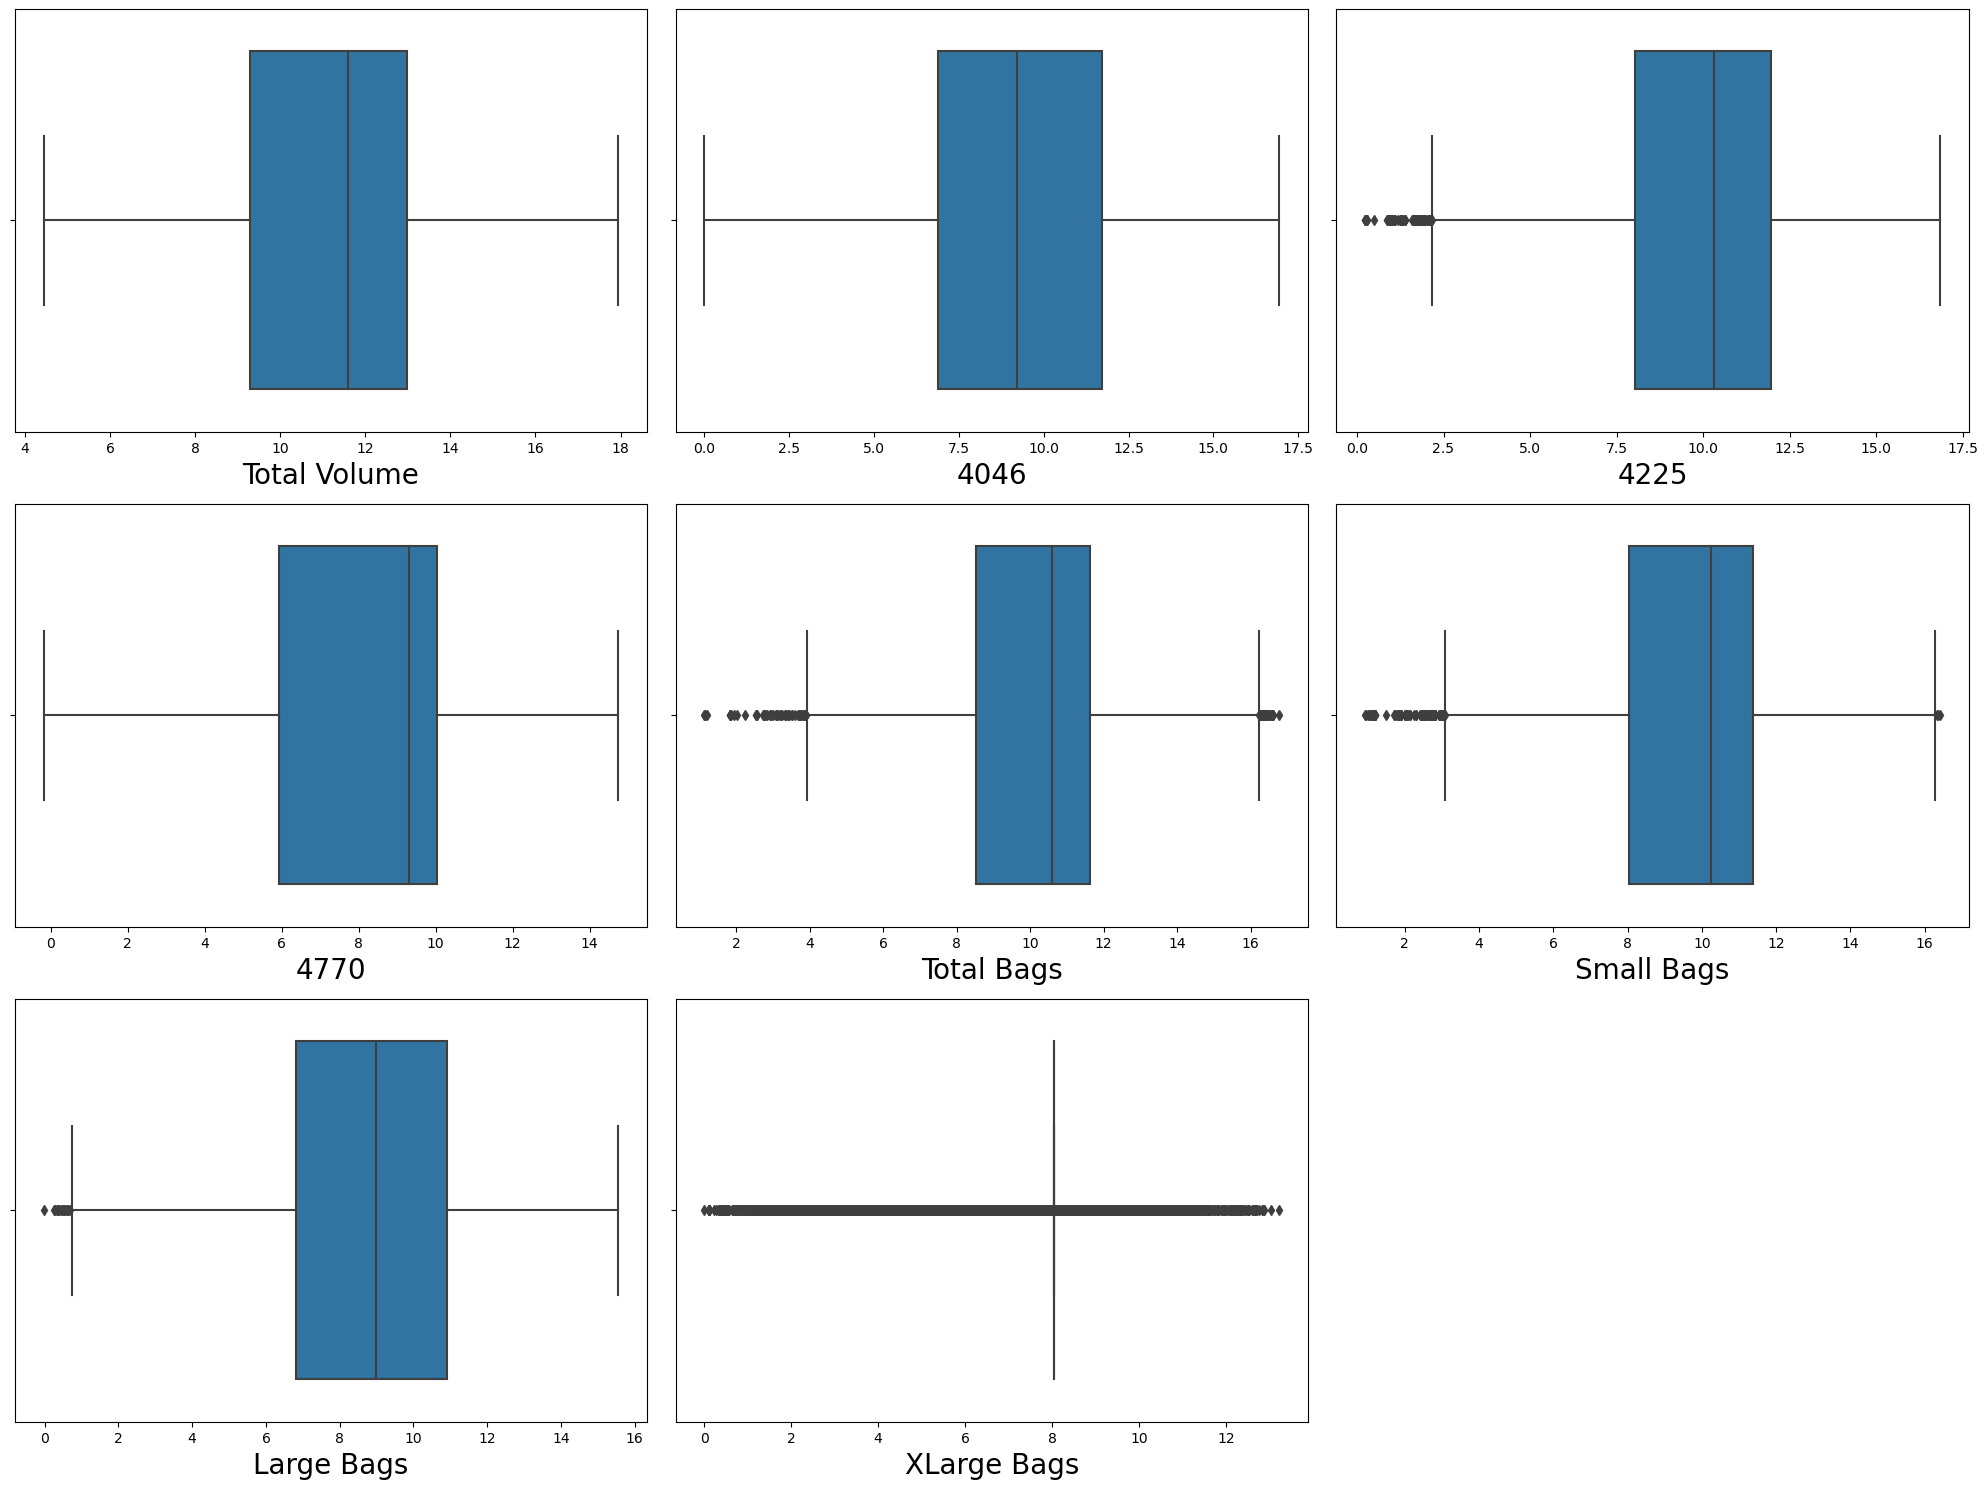

In [24]:
#lets plot box plot
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df[col],data=df)
        plt.xlabel(col, fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

# Observation 
Skewness have reduced  

let's try cube root method

In [25]:
df1=pd.read_csv('C:/Users/91969/Downloads/avocado.csv.zip')
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [26]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [27]:
#changing dtype of DateTime
df1['Date']=pd.to_datetime(df1['Date'])
df1['Month']=df1['Date'].apply(lambda x:x.month)
df1['Day']=df1['Date'].apply(lambda x:x.day)

In [28]:
df1.drop('Date',axis=1,inplace=True)
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [29]:
df1.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [30]:
#Lets transform using cube root method
df1['4046']=np.cbrt(df1['4046'])
df1['4225']=np.cbrt(df1['4225'])
df1['4770']=np.cbrt(df1['4770'])
df1['Total Bags']=np.cbrt(df1['Total Bags'])
df1['Small Bags']=np.cbrt(df1['Small Bags'])
df1['Large Bags']=np.cbrt(df1['Large Bags'])
df1['XLarge Bags']=np.cbrt(df1['XLarge Bags'])
df1['Total Volume']=np.cbrt(df1['Total Volume'])


In [31]:
df1.skew()

AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

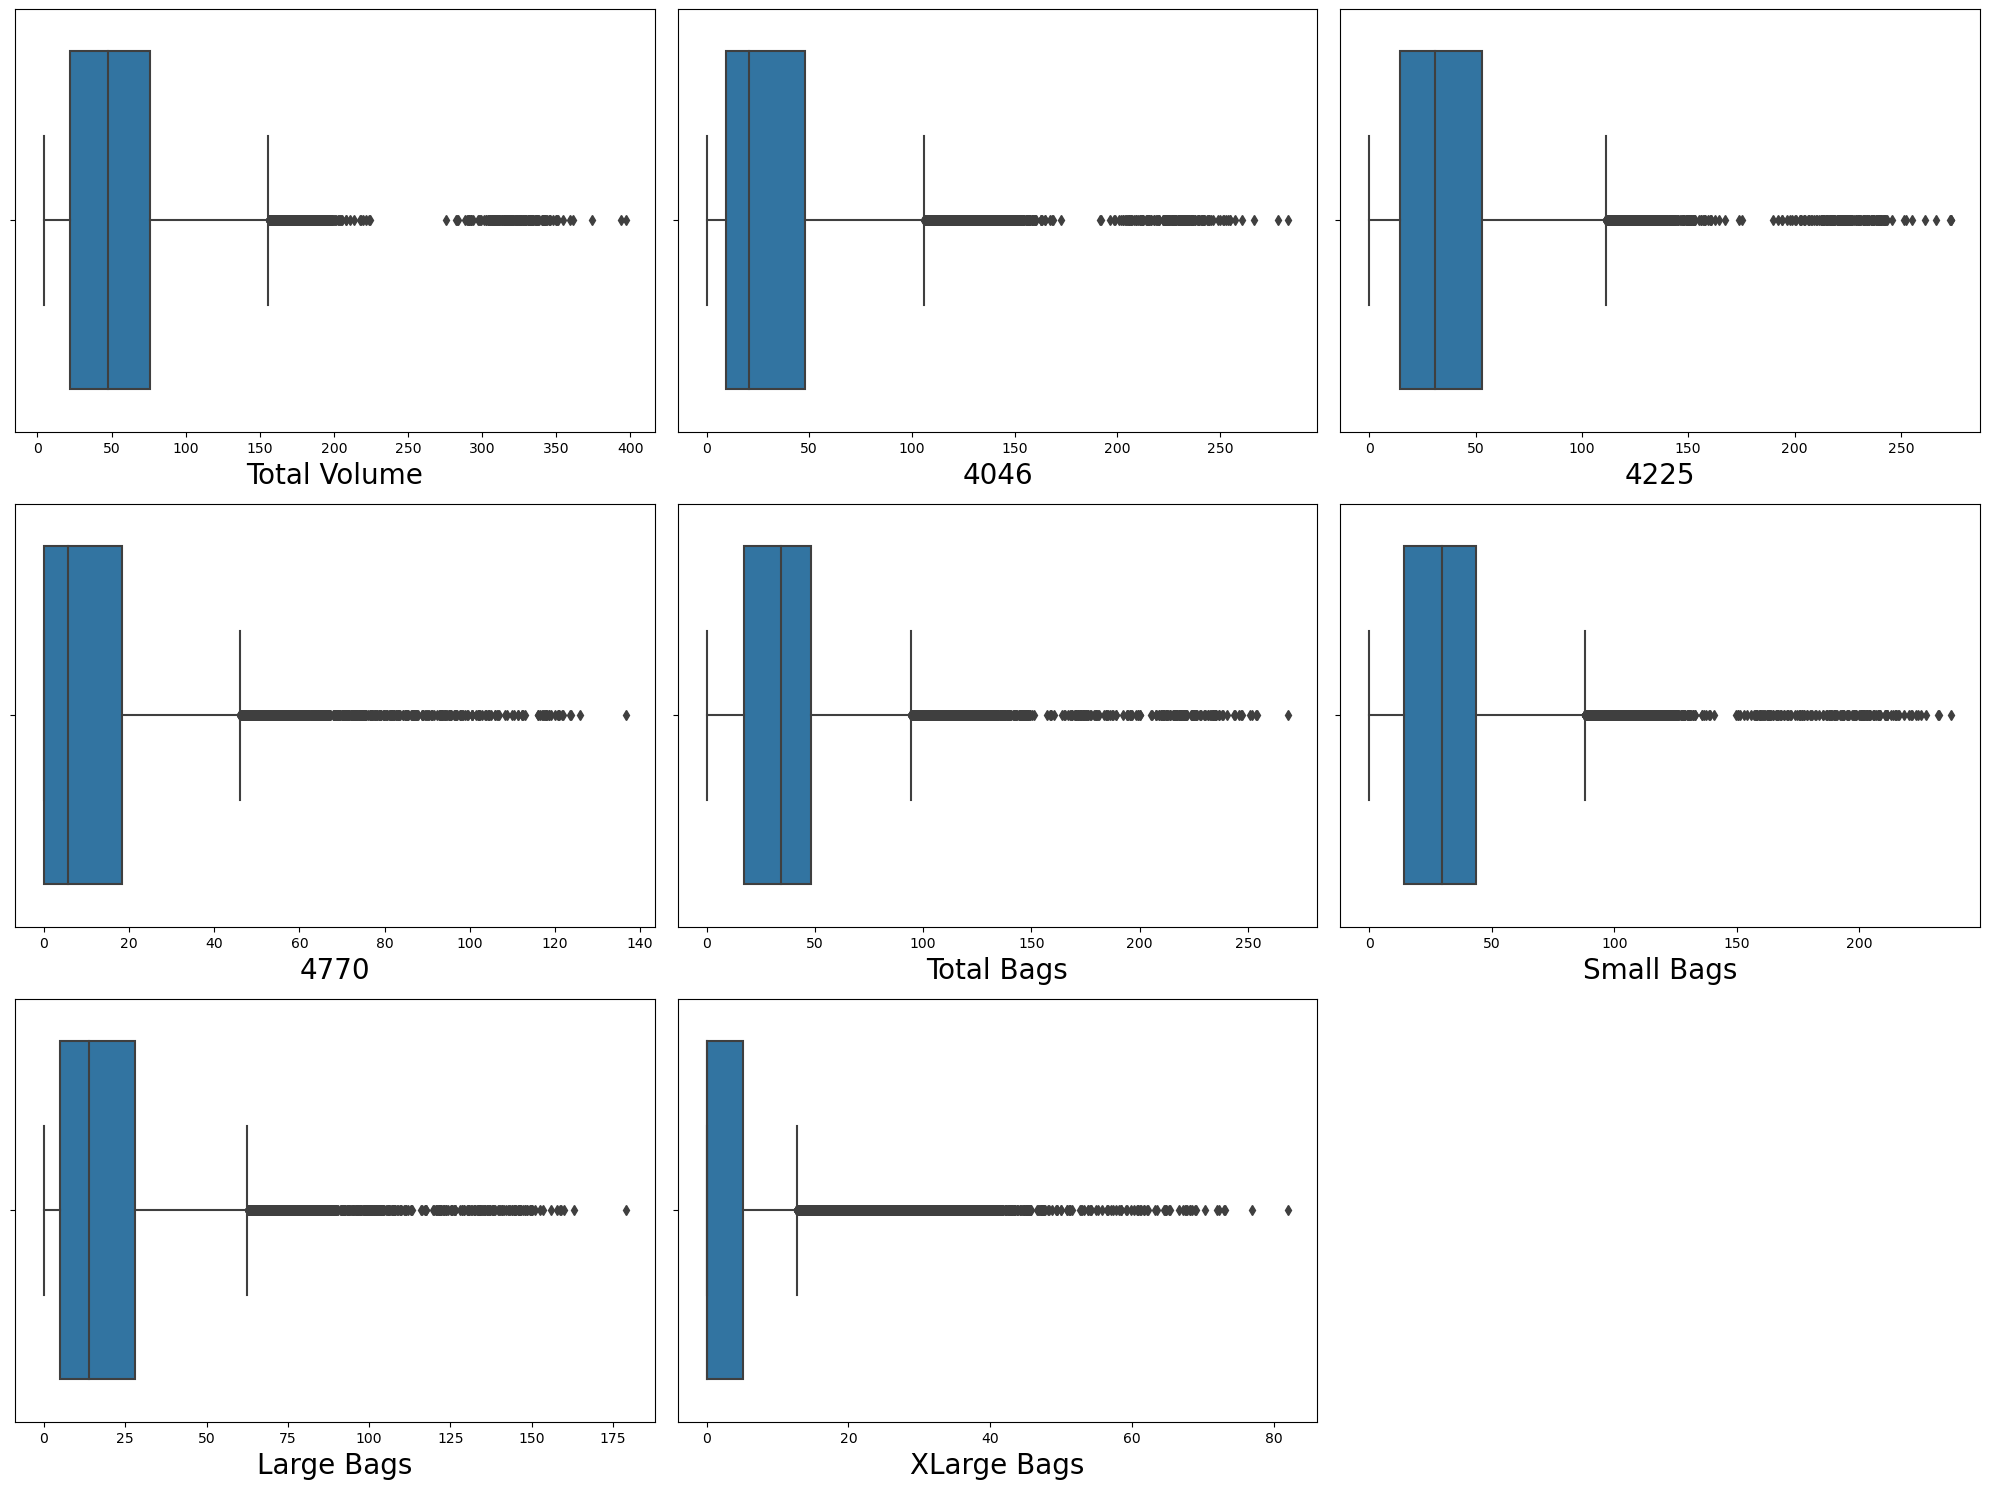

In [32]:
#lets plot box plot
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df1[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df1[col],data=df1)
        plt.xlabel(col, fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

# Skewness have reuced but let's try another method

In [33]:
from sklearn.preprocessing import PowerTransformer

In [34]:
df2=pd.read_csv('C:/Users/91969/Downloads/avocado.csv.zip')
df2.drop('Unnamed: 0',axis=1,inplace=True)
#changing dtype of DateTime
df2['Date']=pd.to_datetime(df2['Date'])
df2['Month']=df2['Date'].apply(lambda x:x.month)
df2['Day']=df2['Date'].apply(lambda x:x.day)
df2.drop('Date',axis=1,inplace=True)


In [35]:
df2.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [36]:
features=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [37]:
scaler=PowerTransformer()
df2[features]=scaler.fit_transform(df2[features].values)
df2[features]

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849
...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849


In [38]:
df2.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

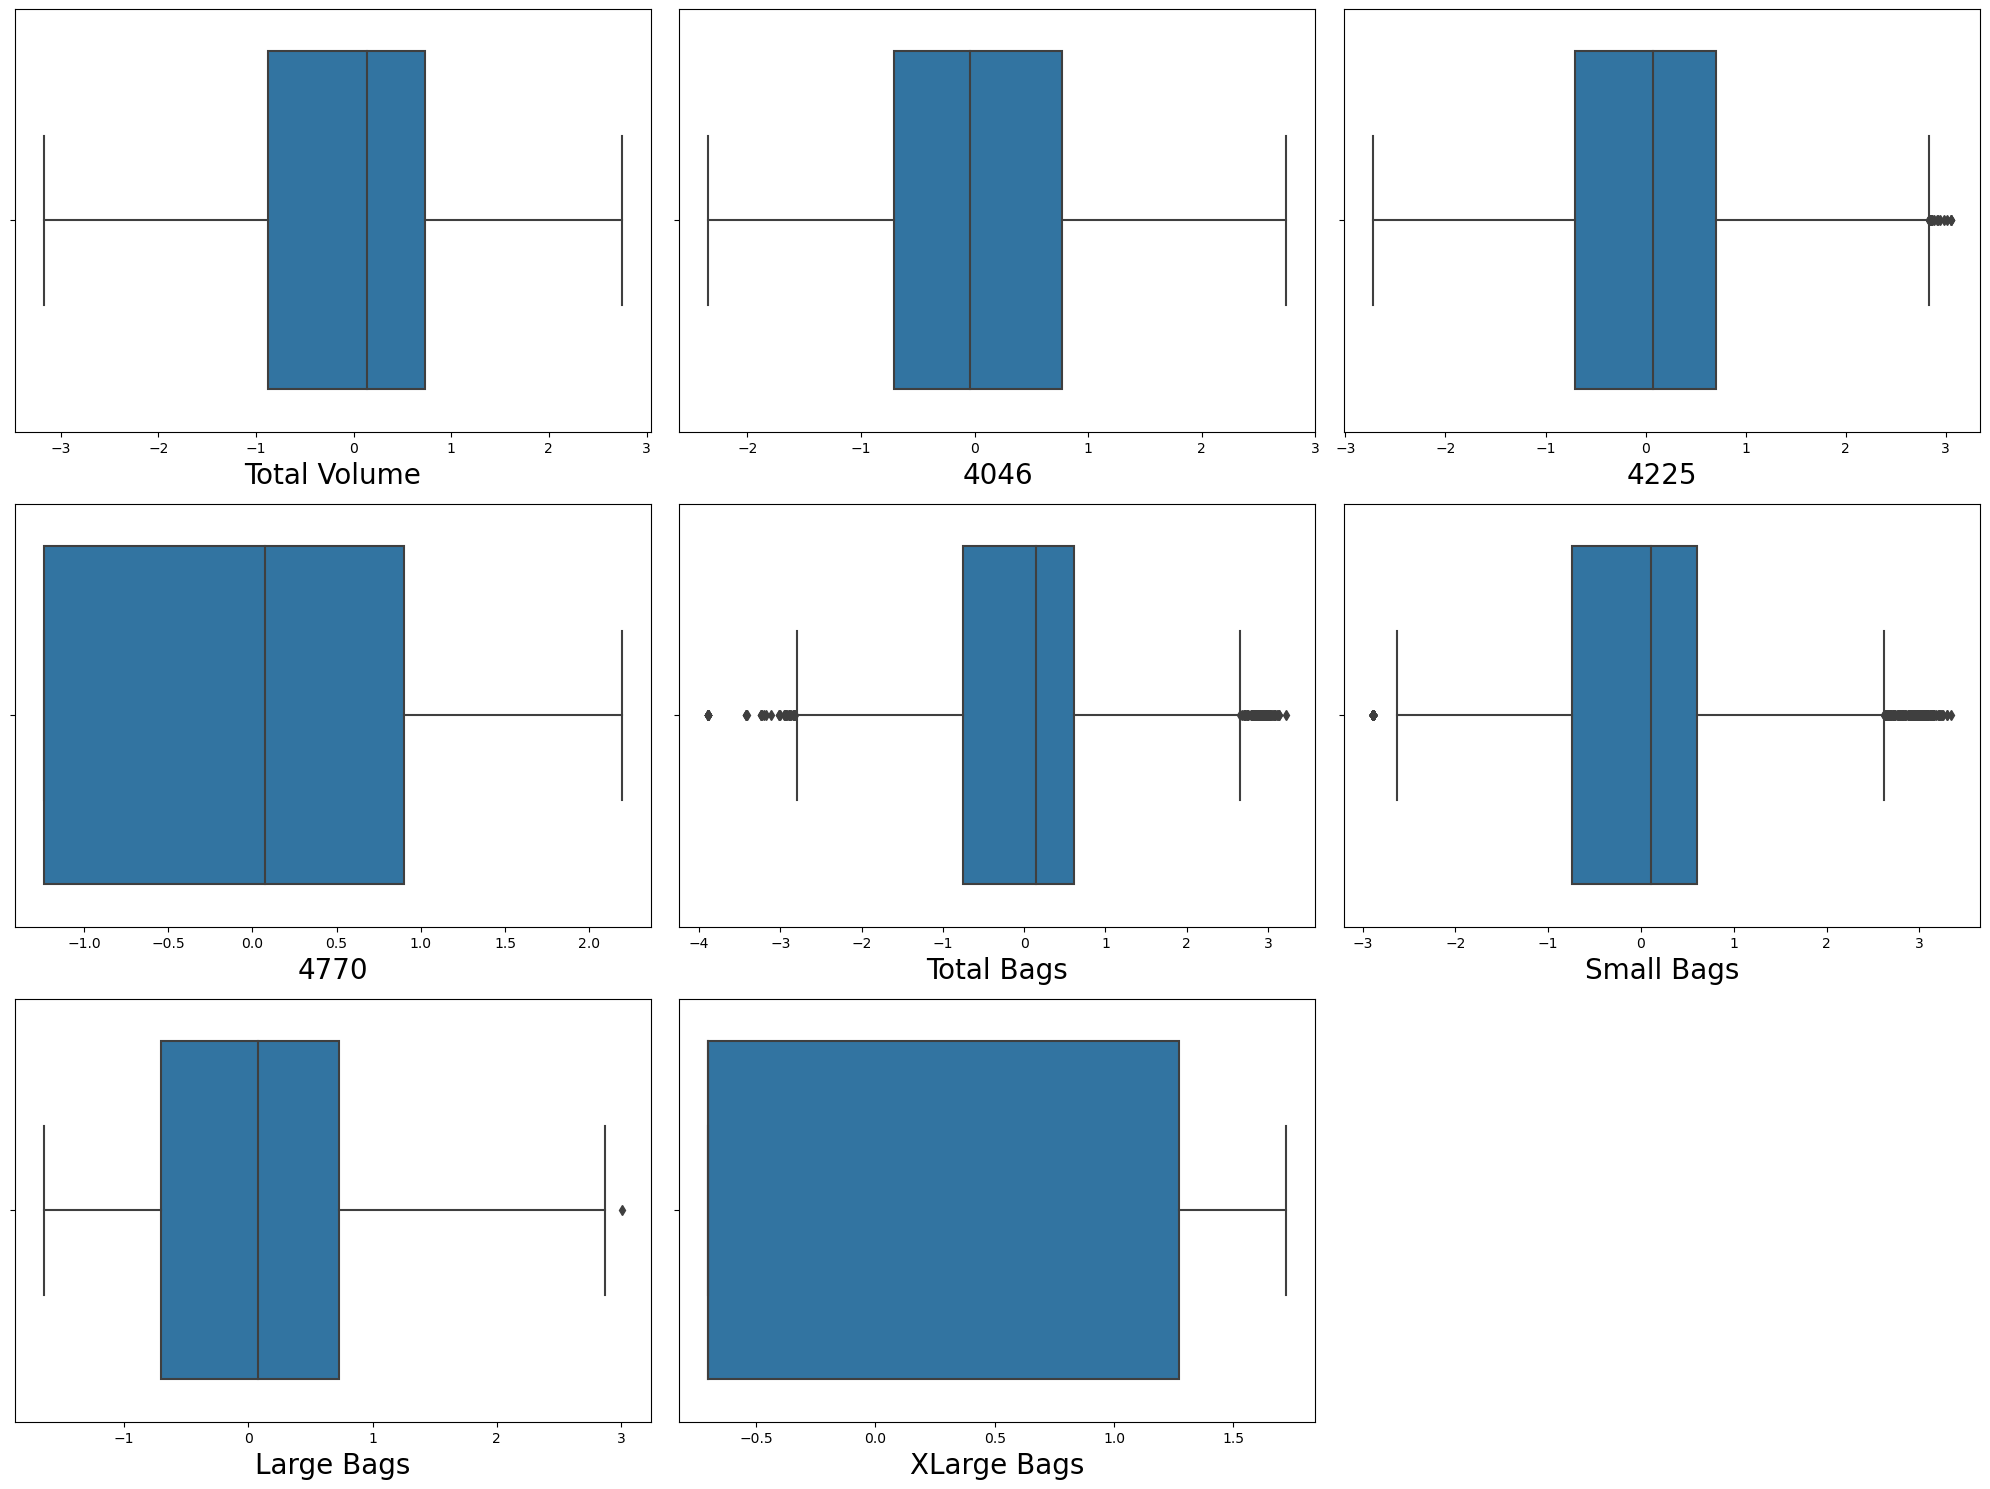

In [39]:
#lets plot box plot
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df2[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df2[col],data=df2)
        plt.xlabel(col, fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

# Observation
Now let's remove outliers

In [40]:
from scipy.stats import zscore

In [41]:
col=df2[['4225','Total Bags','Large Bags','Small Bags']]
z_score=np.abs(zscore(col))
z_score

,4225,Total Bags,Large Bags,Small Bags
0,0.307313,0.524004,0.773351,0.340627
1,0.231647,0.485890,0.763435,0.306425
2,0.579503,0.552018,0.750820,0.366303
3,0.415100,0.695449,0.691865,0.496853
4,0.224806,0.669157,0.600975,0.477201
...,...,...,...,...
18244,0.919470,0.334466,0.410859,0.178839
18245,0.665372,0.496897,0.481465,0.325977
18246,0.772496,0.490952,0.943486,0.308728
18247,0.710543,0.424252,0.908510,0.248932


In [42]:
np.where(z_score>3)

(array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
         5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
         5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
         8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
         8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
         8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
         8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
         8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
         9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
         9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
         9099,  9100,  9101,  9212,  9894, 11024, 11320, 11321, 11322,
        11325, 11326, 11332, 11333, 11336, 11338, 11340, 11342, 11347,
        11348, 11349, 11350, 11354, 11387, 11388, 11594, 11595, 11596,
        11597, 11614, 11662, 12132, 14404], dtype=int64),
 array([0, 3, 3, 3,

In [43]:
data=df2[(z_score<3).all(axis=1)]
data.shape

(18152, 14)

In [44]:
#let's check for dataloss
print('Data loss is :',((df2.shape[0]-data.shape[0])/df2.shape[0])*100)

Data loss is : 0.5315359745739492


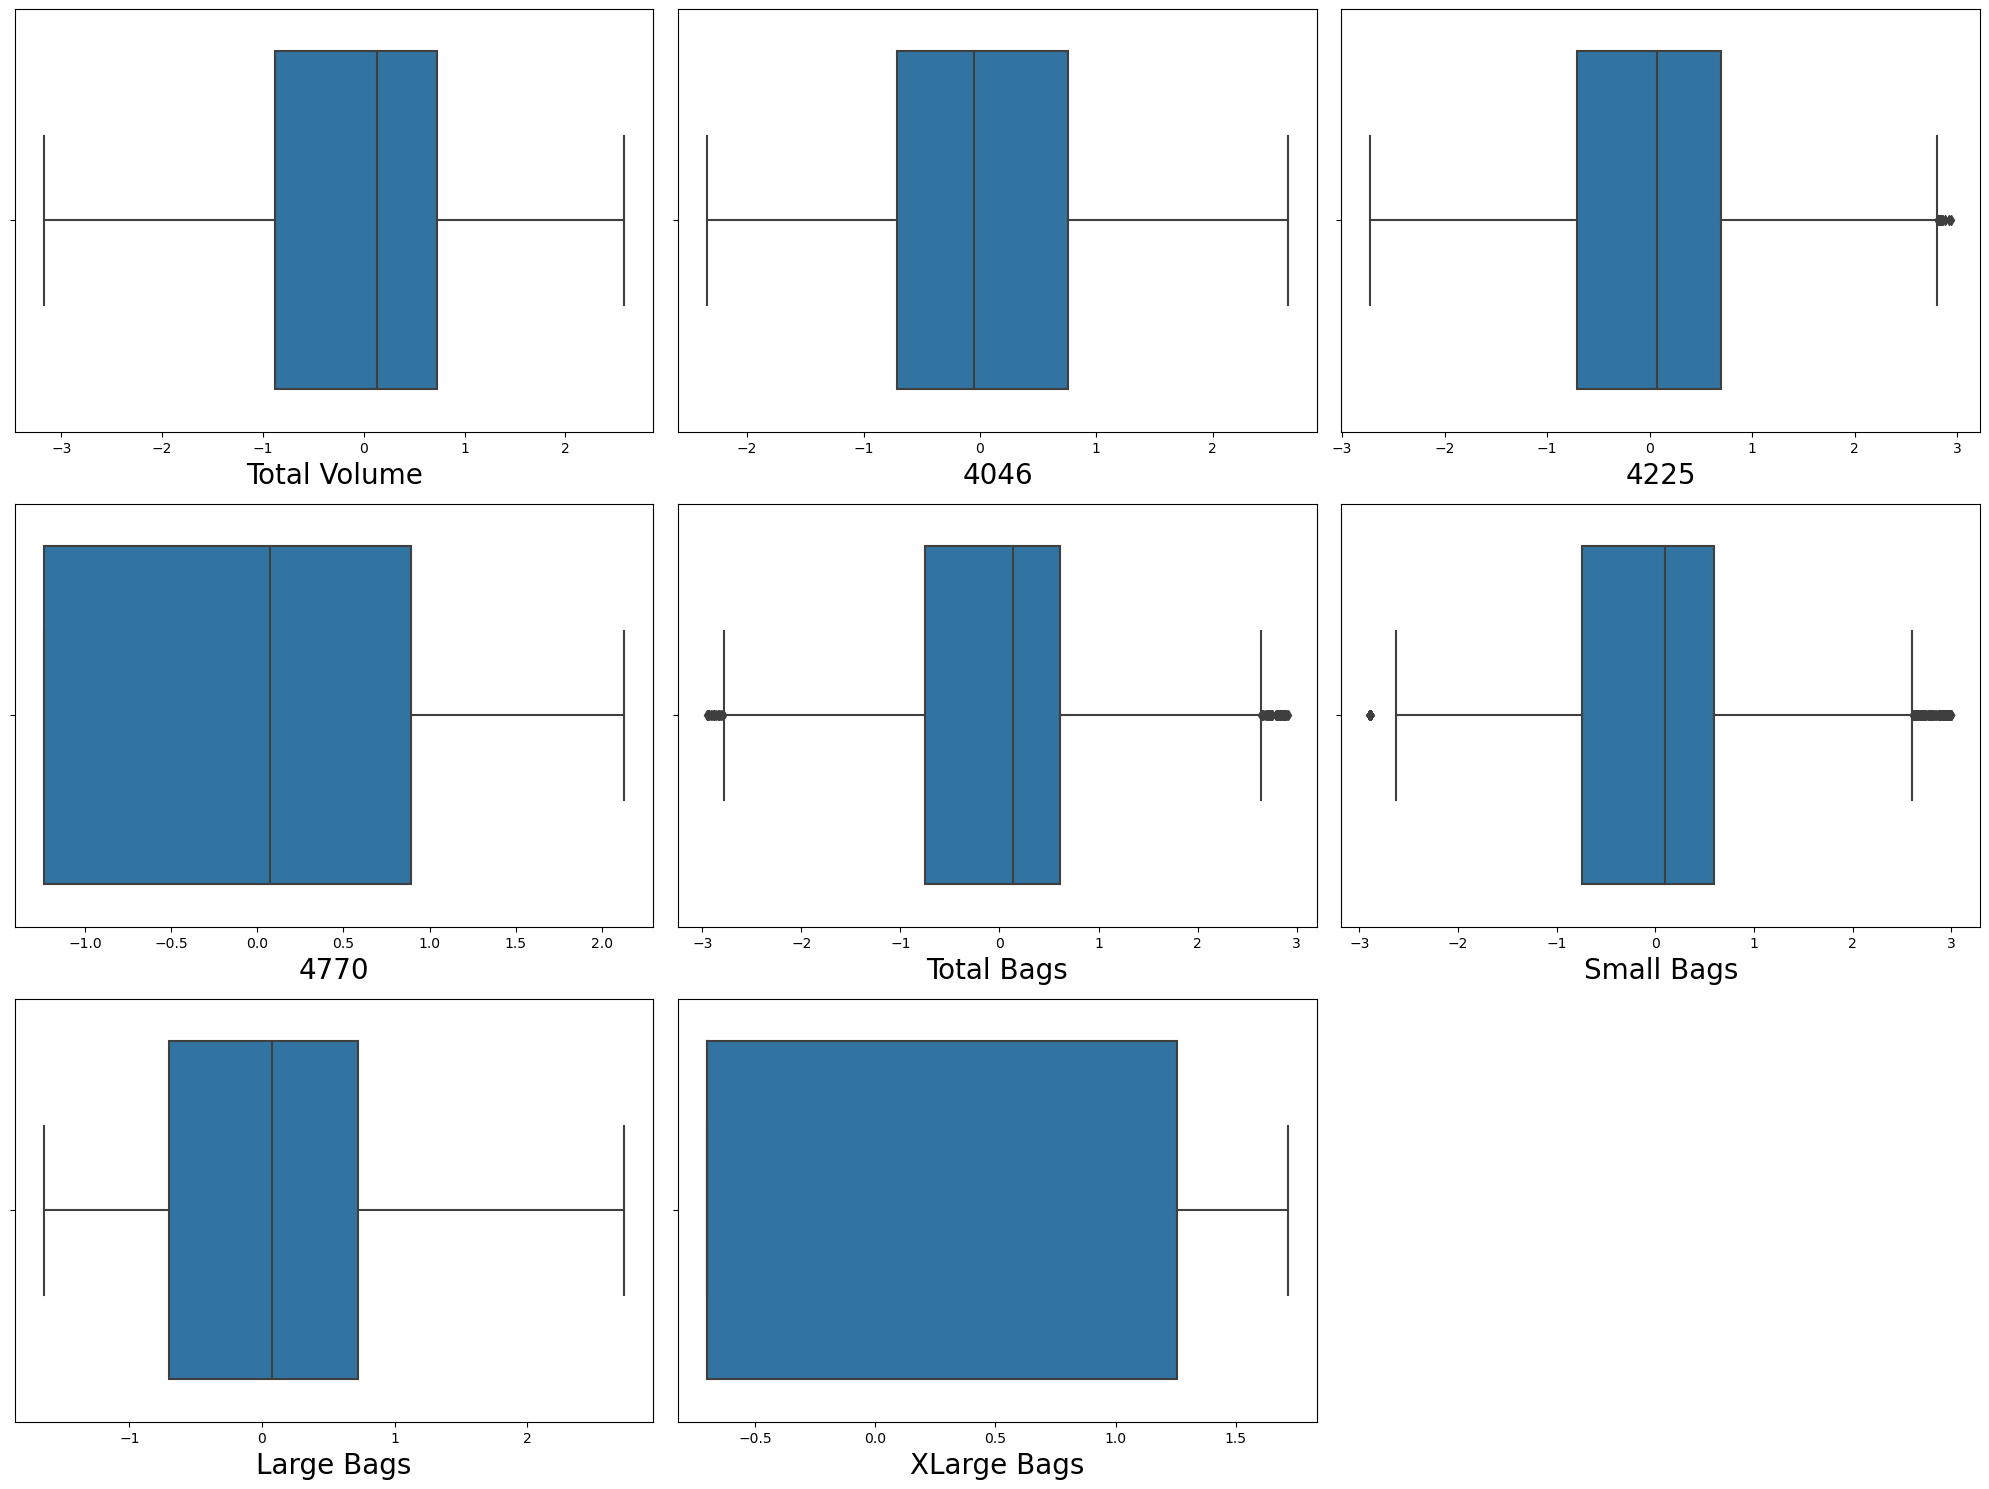

In [45]:
#lets plot box plot
plt.figure(figsize=(20,15))
plotnumber = 1
for col in data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[col],data=data)
        plt.xlabel(col, fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

# Observation
1.Still there are some outliers after removing.

i m keeping them and let's check corelation 

In [46]:
corr=data.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.584141,-0.554710,-0.459153,-0.502951,-0.572998,-0.500738,-0.487039,-0.402178,0.098258,0.161039,0.027207
Total Volume,-0.584141,1.000000,0.894973,0.925864,0.828408,0.944780,0.906117,0.698519,0.649965,0.081925,-0.030374,-0.009345
4046,-0.554710,0.894973,1.000000,0.780384,0.752232,0.812554,0.789224,0.623846,0.598277,0.005054,-0.030016,-0.007412
4225,-0.459153,0.925864,0.780384,1.000000,0.807412,0.827857,0.789698,0.641105,0.607254,0.002097,-0.027990,-0.009215
4770,-0.502951,0.828408,0.752232,0.807412,1.000000,0.776533,0.766542,0.573423,0.638646,-0.046052,-0.021953,-0.001492
Total Bags,-0.572998,0.944780,0.812554,0.827857,0.776533,1.000000,0.948188,0.742179,0.636052,0.208892,-0.019813,-0.006630
Small Bags,-0.500738,0.906117,0.789224,0.789698,0.766542,0.948188,1.000000,0.585056,0.623690,0.184346,-0.015347,-0.003843
Large Bags,-0.487039,0.698519,0.623846,0.641105,0.573423,0.742179,0.585056,1.000000,0.483485,0.185579,-0.019946,-0.003626
XLarge Bags,-0.402178,0.649965,0.598277,0.607254,0.638646,0.636052,0.623690,0.483485,1.000000,0.160786,0.012418,0.006670
year,0.098258,0.081925,0.005054,0.002097,-0.046052,0.208892,0.184346,0.185579,0.160786,1.000000,-0.175817,0.004859


In [47]:
#lets encode categorical features using label encoder
from sklearn.preprocessing import LabelEncoder 

In [48]:
for col in data.columns:
    if data[col].dtype == object:
        label = LabelEncoder()
        data[col] = label.fit_transform(data[col])

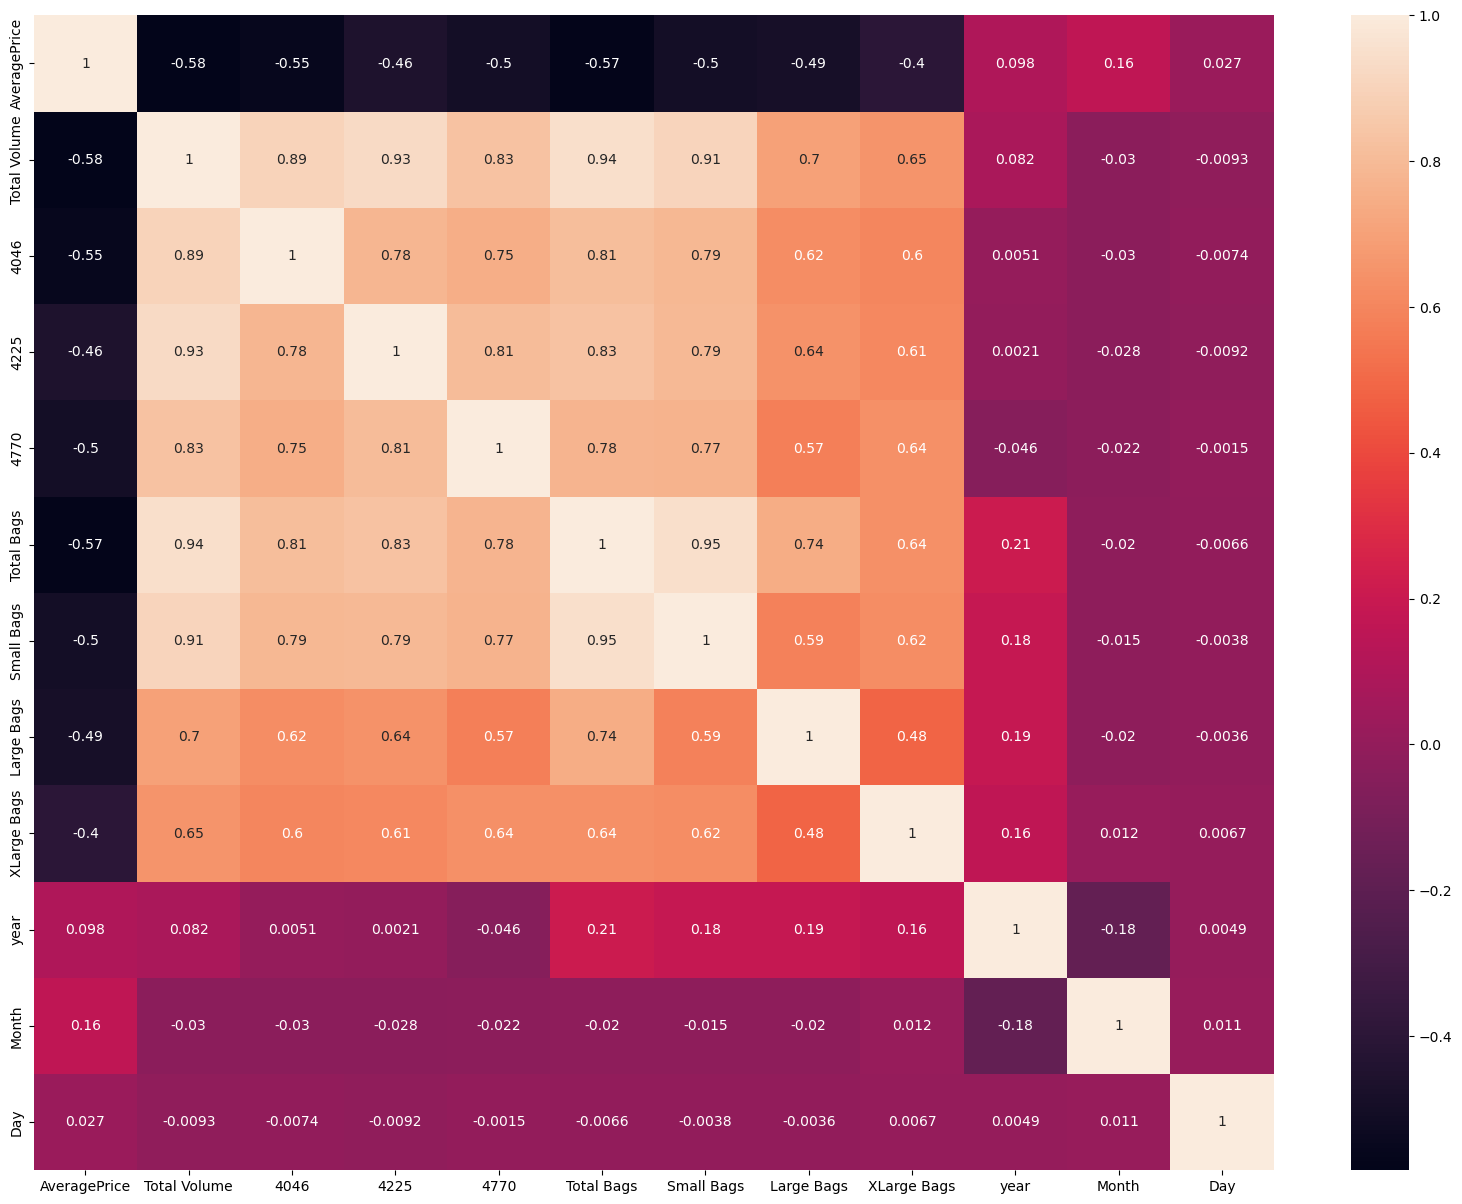

In [49]:
#let's plot heat map
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

# Observation
1.Day,year are in very less relation with our target variable.

2.Rest all features are in negative relation with our label.

3.4046,4225,4770,total bags,small bags are in very high positive corelation with our total volume column.

4.4225,4770,total bags,small bags are in positive relation with 4046 column.

5.We can observe other relation as well

now let's check for multicollinearity issue

In [50]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,2015,0,12,27
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,2015,0,12,20
2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,2015,0,12,13
3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,2015,0,12,6
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1,2018,53,2,4
18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1,2018,53,1,28
18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1,2018,53,1,21
18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1,2018,53,1,14


In [51]:
#let's separate features and label
X=data.drop(columns=['AveragePrice'],axis=1)
y=data['AveragePrice']

In [52]:
#now lets standarize our dataset
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(data[['year']])



In [53]:
X.drop(columns=['year'],axis=1,inplace=True)
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,0,12,27
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,0,12,20
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,0,12,13
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,0,12,6
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1,53,2,4
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1,53,1,28
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1,53,1,21
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1,53,1,14


In [54]:
x=pd.concat([X,pd.DataFrame(X_scaled)],axis=1)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day,0
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0.0,0.0,12.0,27.0,-1.221161
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0.0,0.0,12.0,20.0,-1.221161
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0.0,0.0,12.0,13.0,-1.221161
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0.0,0.0,12.0,6.0,-1.221161
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0.0,0.0,11.0,29.0,-1.221161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.221161
11614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.221161
11662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.221161
12132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156742


In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 14404
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  18152 non-null  float64
 1   4046          18152 non-null  float64
 2   4225          18152 non-null  float64
 3   4770          18152 non-null  float64
 4   Total Bags    18152 non-null  float64
 5   Small Bags    18152 non-null  float64
 6   Large Bags    18152 non-null  float64
 7   XLarge Bags   18152 non-null  float64
 8   type          18152 non-null  float64
 9   region        18152 non-null  float64
 10  Month         18152 non-null  float64
 11  Day           18152 non-null  float64
 12  0             18152 non-null  float64
dtypes: float64(13)
memory usage: 1.9 MB
